Saving Weather Data Set.csv to Weather Data Set (9).csv
Variance Before (Sample):
 MinTemp        40.522772
MaxTemp        50.241499
Rainfall       70.266098
Evaporation     9.995343
Sunshine        7.450092
dtype: float64


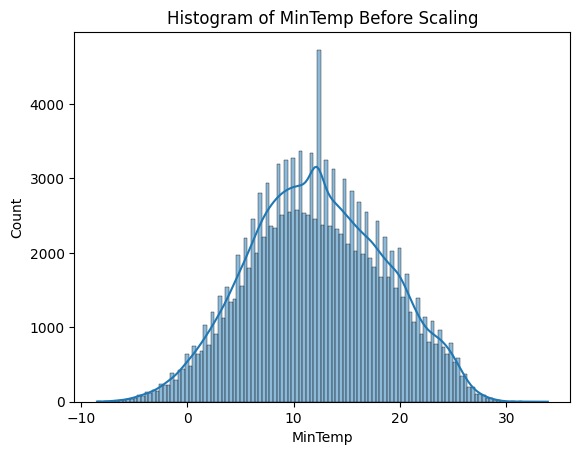

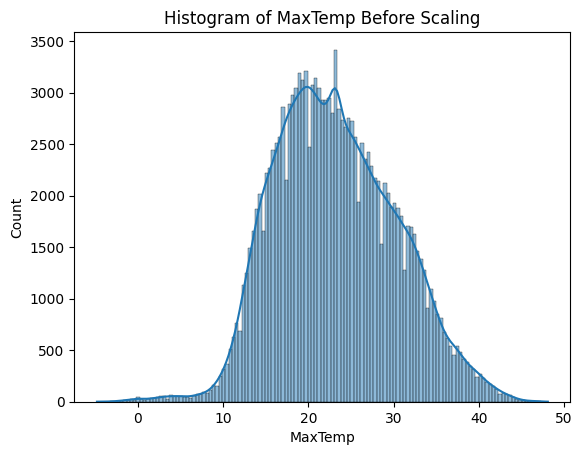

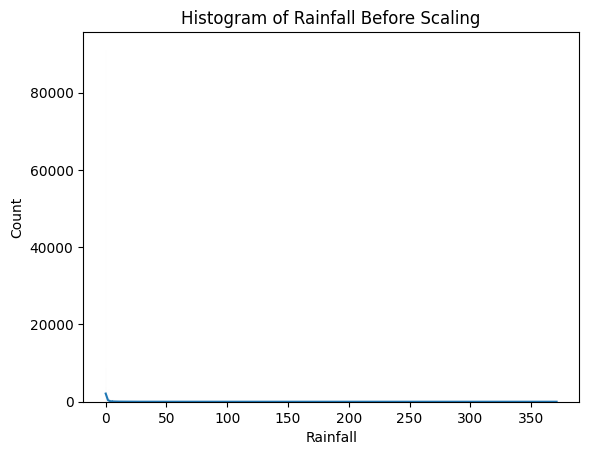

Variance After (Sample):
 MinTemp        1.000007
MaxTemp        1.000007
Rainfall       1.000007
Evaporation    1.000007
Sunshine       1.000007
dtype: float64
Scaled Correlations:
 MinTemp        0.082175
MaxTemp       -0.156850
Rainfall       0.233900
Evaporation   -0.088286
Sunshine      -0.321532
Name: RainTomorrow, dtype: float64


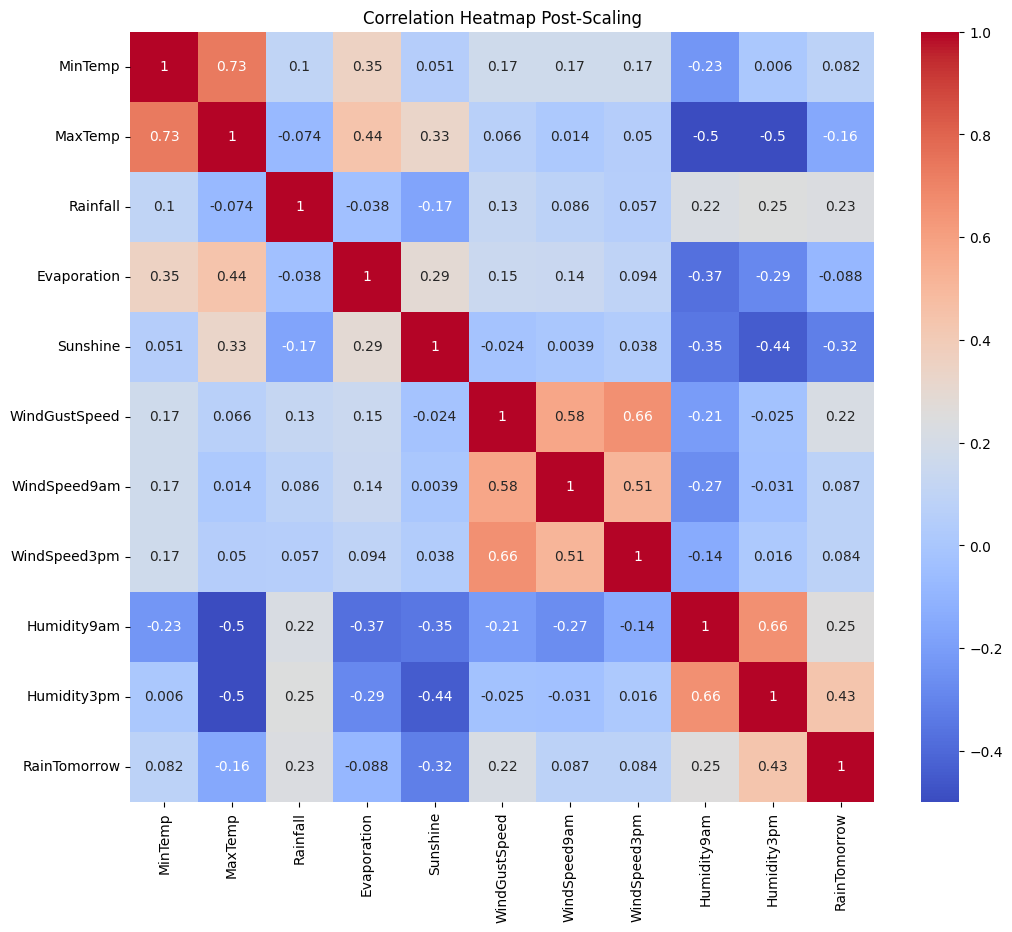

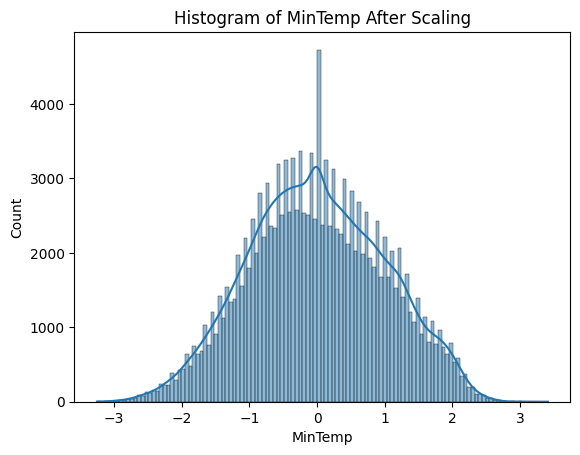

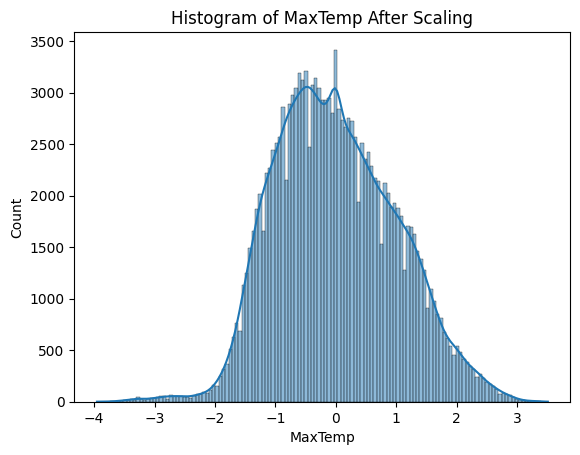

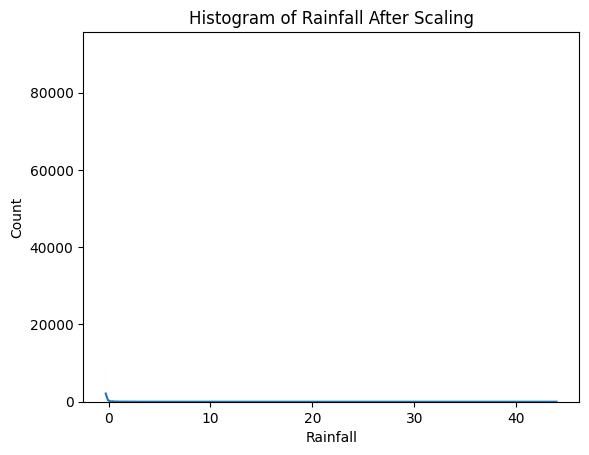

Scaling completed. Data saved as 'scaled_weather_data.csv'


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Upload dataset
from google.colab import files
uploaded = files.upload()

# Load the data
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Identify numerical cols
if 'RainTomorrow' in df.columns:
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('RainTomorrow', errors='ignore')
else:
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# EDA: Compare variance/std before
print("Variance Before (Sample):\n", df[numerical_cols[:5]].var())

# Visualizations before
for col in numerical_cols[:3]:  # Sample
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col} Before Scaling')
    plt.show()

# Preprocessing: Scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# EDA after: Variance/std after (should be ~1)
print("Variance After (Sample):\n", df[numerical_cols[:5]].var())

# Check scaled correlations
if 'RainTomorrow' in df.columns:
    corr_scaled = df[numerical_cols[:5].tolist() + ['RainTomorrow']].corr()['RainTomorrow'].drop('RainTomorrow', errors='ignore')
    print("Scaled Correlations:\n", corr_scaled)

# Visualizations after
plt.figure(figsize=(12, 10))
if 'RainTomorrow' in df.columns:
    sns.heatmap(df[numerical_cols[:10].tolist() + ['RainTomorrow']].corr(), annot=True, cmap='coolwarm')
else:
    sns.heatmap(df[numerical_cols[:10]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Post-Scaling')
plt.show()

for col in numerical_cols[:3]:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col} After Scaling')
    plt.show()

# Save the scaled dataframe for the next member
df.to_csv('scaled_weather_data.csv', index=False)
print("Scaling completed. Data saved as 'scaled_weather_data.csv'")